# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
# Your Code Here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [2]:
pwd

'/mnt/c/Users/yabo9/ironhack/labs/lab-matplotlib-seaborn/your-code'

In [3]:
# your code here
fitbit = pd.read_csv("../data/Fitbit2.csv")

In [17]:
fitbit


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [34]:
months = fitbit.groupby(["Months_encoded"])["Steps"].mean()
weeks = fitbit.groupby(["Days"])["Steps"].mean()
weekends = fitbit.groupby(["Work_or_Weekend"])["Steps"].mean()

<AxesSubplot:xlabel='Work_or_Weekend'>

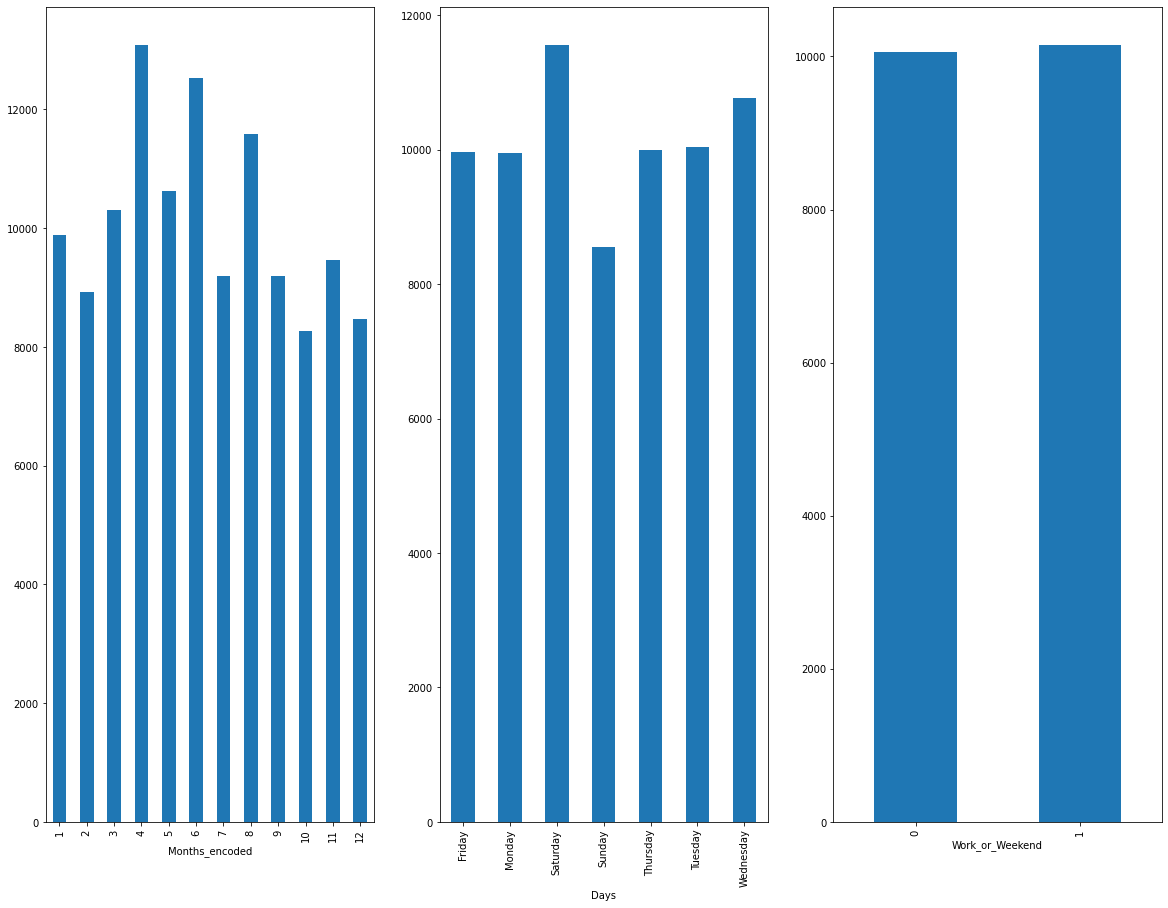

In [72]:
#This is just a test
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,15))
months.plot(kind="bar",  ax=axs[0])
weeks.plot(kind="bar",  ax=axs[1])
weekends.plot(kind="bar",  ax=axs[2])


In [63]:
pwd

'/mnt/c/Users/yabo9/ironhack/labs/lab-matplotlib-seaborn/your-code'

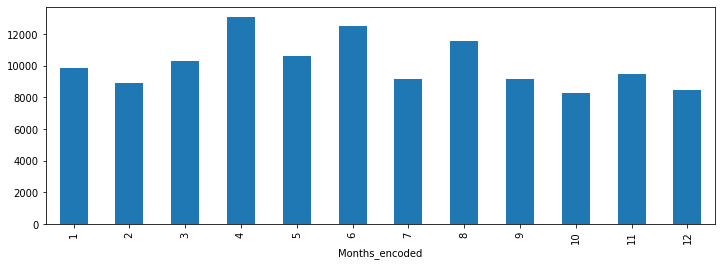

In [66]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here

picture_months = months.plot(kind="bar", figsize = (12,4))



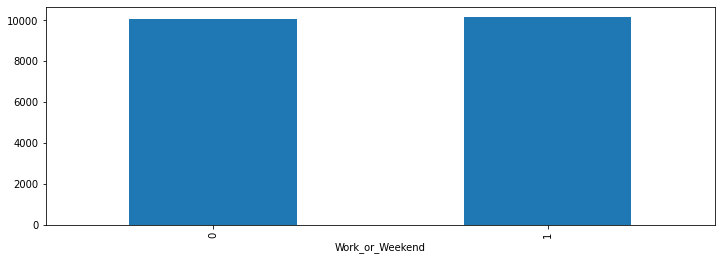

In [68]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here
picture_weekends = weekends.plot(kind="bar", figsize = (12,4))

#The avarege is almost the same on work days and weekends

In [71]:
#Save images
picture_weekends.figure.savefig("../images/picture_weekends.jpg", dpi=1000)
picture_months.figure.savefig("../images/picture_months.jpg", dpi=1000)


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [73]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

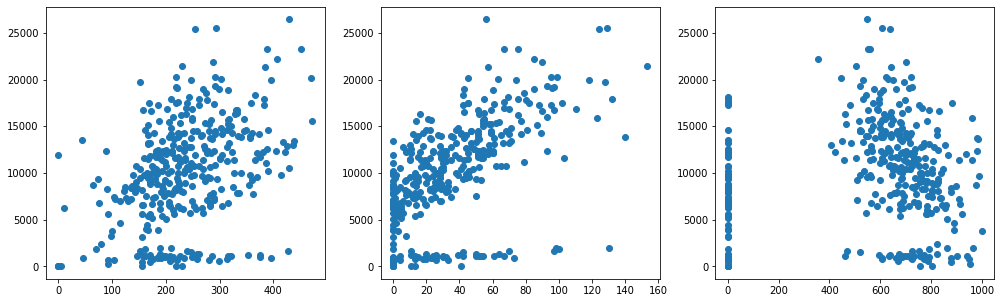

In [98]:
plt.figure(figsize=(17,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(x=fitbit[list_minutes[i]], y=fitbit["Steps"])

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [2]:
# your code here
titanic = pd.read_csv("../data/titanic.csv")

#### Explore the titanic dataset using Pandas dtypes.

In [105]:
# your code here
titanic.dtypes


PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [103]:
# NUMERICAL VARIABLES
# your code here
#solution 1
titanic.select_dtypes(include=["int64", "float64"]).head()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [104]:
#Solution 2
titanic.select_dtypes(include=np.number).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [108]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include="object").head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [114]:
# your code here
import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (12.,6.)})
sns.set_style('white')

#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

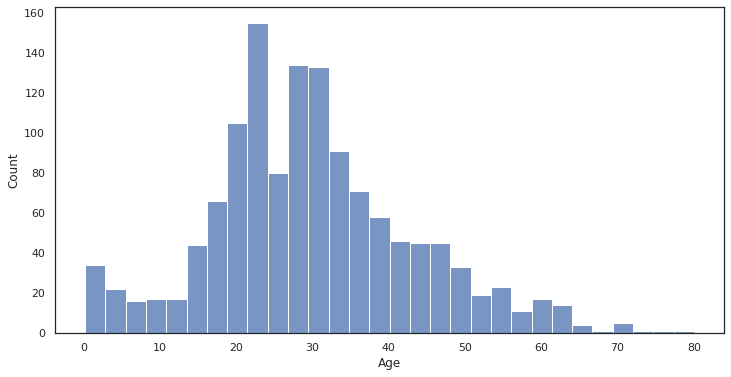

In [115]:
# your code here
sns.histplot(x=titanic.Age)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<AxesSubplot:xlabel='Age', ylabel='Count'>

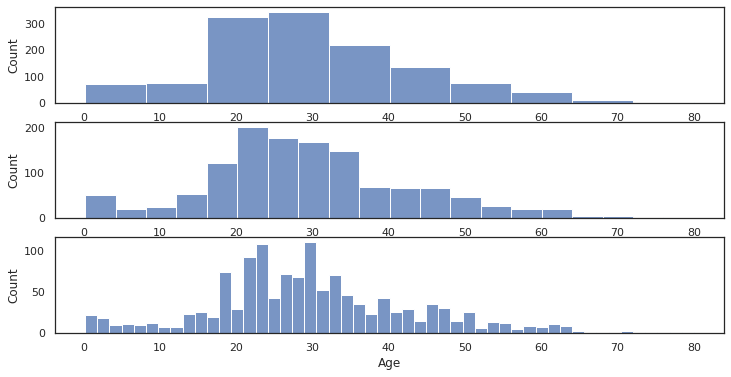

In [120]:
# your code here
#I did it in vertical to change it a bit from the previous subplot
fig, axs = plt.subplots(nrows=3, ncols=1)

sns.histplot(x=titanic.Age, bins=10, ax=axs[0])
sns.histplot(x=titanic.Age, bins=20, ax=axs[1])
sns.histplot(x=titanic.Age, bins=50, ax=axs[2])


#### How does the bin size affect your plot?

In [122]:
"""
You are able to see in more detail the the quantity of people for more different ranges of ages
"""

'\nYou are able to see in more detail the the quantity of people for more different ranges of ages\n'

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

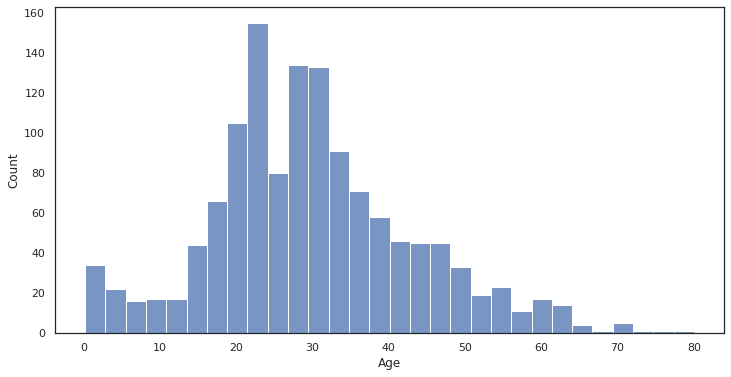

In [123]:
# your code here
sns.histplot(x=titanic.Age)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<AxesSubplot:title={'center':'Gender'}>

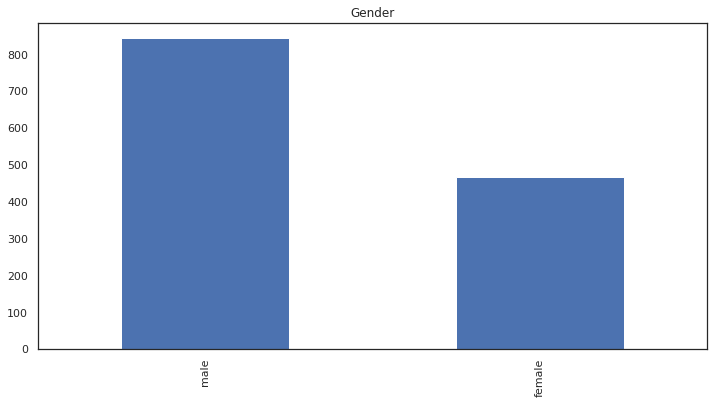

In [149]:
# Method 1 - matplotlib
# your code here
titanic["Gender"].value_counts().plot(kind="bar",
                                        figsize=(12,6),
                                        title="Gender")


<AxesSubplot:xlabel='Gender', ylabel='Count'>

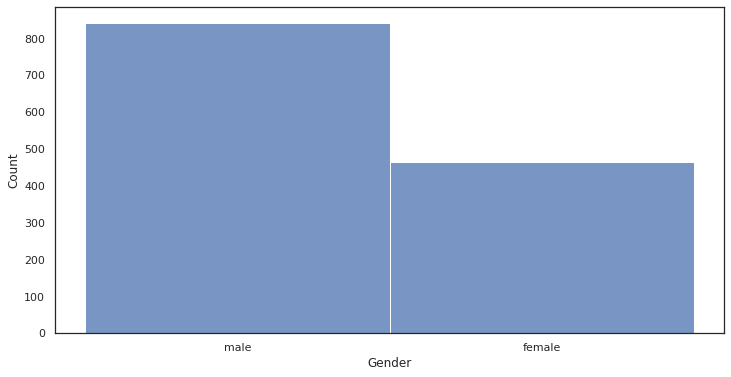

In [134]:
# Method 2 - seaborn
# your code here
sns.histplot(x=titanic.Gender)

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

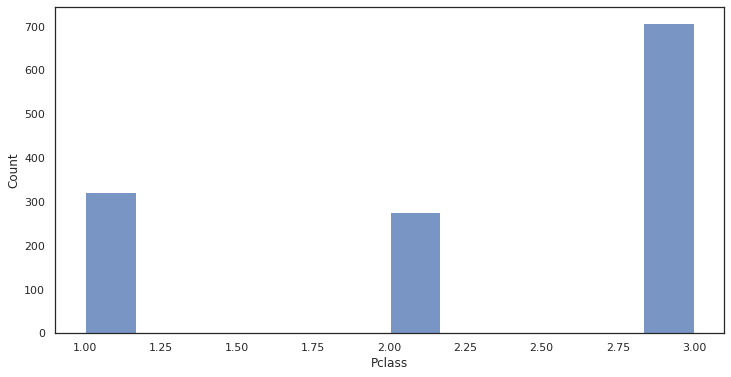

In [151]:
# your code here
sns.histplot(x=titanic["Pclass"])

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

/home/diegodiazgarciadev/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.18, 0.14, 'count    1309.000000\nmean       29.879186\nstd        13.448335\nmin         0.170000\n25%        22.000000\n50%        28.500000\n75%        37.000000\nmax        80.000000')

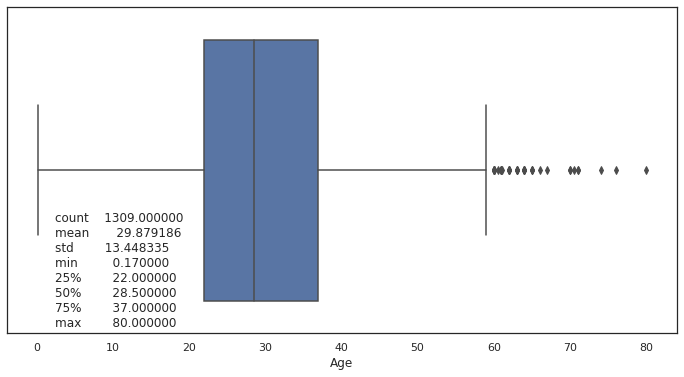

In [183]:
# your code here
sns.boxplot(titanic.Age)

#I have added this line to see literally the statistics data
plt.figtext(0.18,0.14, titanic.describe()["Age"].to_string())



#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
We can see the avarenge age is around 30 years old, that there are outlayers from 60's and 80,s
The 75% of ages are between 22 years old and 37.
We can see as well the max and min ages (80 which is an outlayer) and 0.17 (guessing it is a baby)
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

Text(0.18, 0.14, 'count    1309.000000\nmean       29.879186\nstd        13.448335\nmin         0.170000\n25%        22.000000\n50%        28.500000\n75%        37.000000\nmax        80.000000')

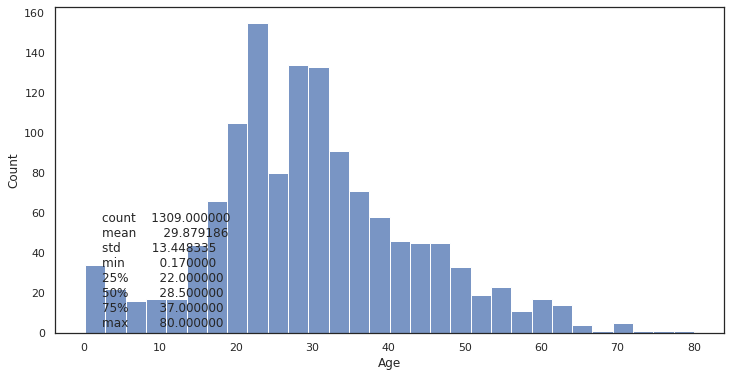

In [186]:
# your code here
sns.histplot(x=titanic.Age)
plt.figtext(0.18,0.14, titanic.describe()["Age"].to_string())


#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
We can see more claearly the quantity of people for age ranges
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

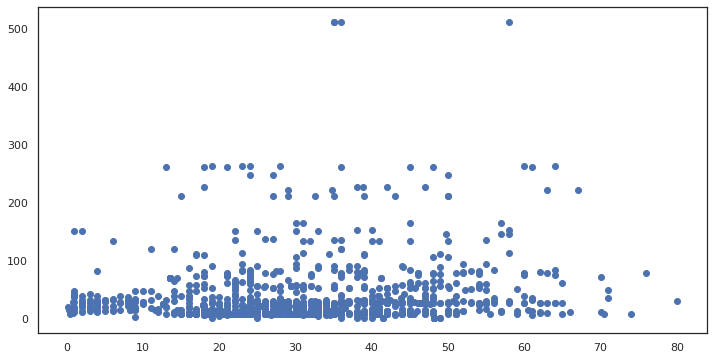

In [194]:
# Method 1 - matplotlib
# your code here
plt.scatter(x=titanic["Age"], y=titanic["Fare"])

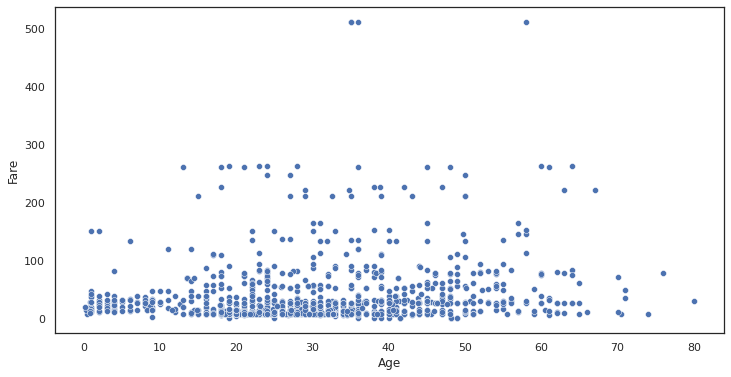

In [189]:
# Method 2 - seaborn
# your code here


sns.scatterplot(x="Age", y="Fare", data=titanic);

#### Plot the correlation matrix using seaborn.

In [196]:
# your code here
corr = titanic.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_numeric
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128,NaN
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307,NaN
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683,NaN
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355,NaN
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349,NaN
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635,NaN
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000,NaN
Gender_numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### What are the most correlated features?

'\nyour comments here\n'

<AxesSubplot:>

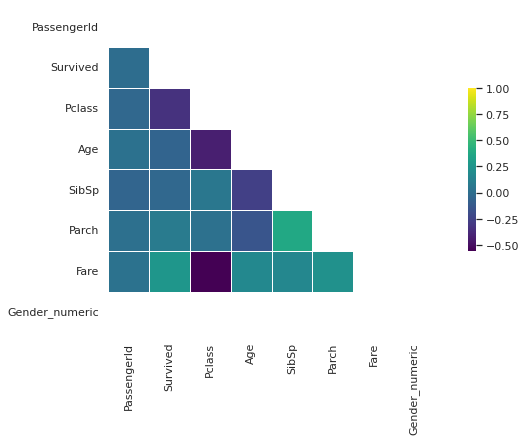

In [210]:
mascara = np.triu(np.ones_like(corr, dtype=bool)) # 
color_map = sns.diverging_palette(0, 10, as_cmap=True) # 


sns.heatmap(corr,
            mask=mascara,
            cmap="viridis",
            vmax=1,
            square=True,
            linewidth=.5,
            cbar_kws={"shrink": .5} )

In [ ]:

"""
your comments here
The heatmap correlation matrix show us with the most intense colour the more correlation features (close to -1 or close t 1)
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

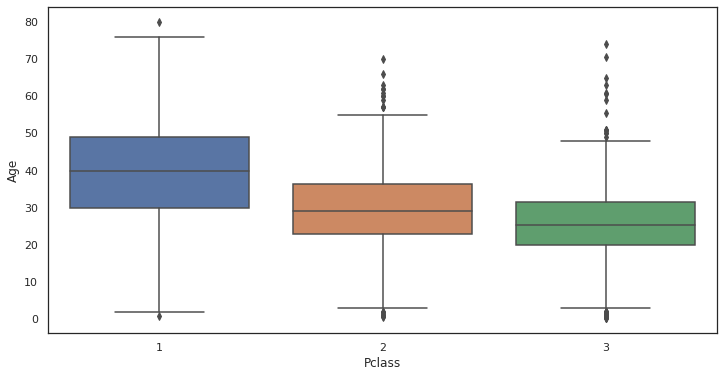

In [219]:
# your code her
sns.boxplot(x=titanic.Pclass,y=titanic.Age )

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

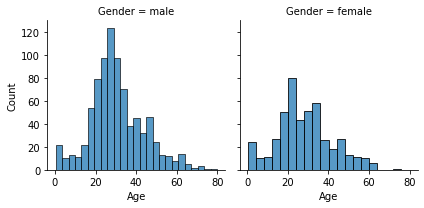

In [3]:
g = sns.FacetGrid(titanic, col="Gender")
g.map(sns.histplot, "Age")